In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_daily.csv").dropna()

df['# Date'] = pd.to_datetime(df['# Date'])
df['month'] = df['# Date'].dt.month
df['dayOfWeek'] = df['# Date'].dt.dayofweek
df['hours'] = df['# Date'].dt.hour

df['month_sin'] = np.sin(2*np.pi*df['month']/11.0)
df['month_cos'] = np.cos(2*np.pi*df['month']/11.0)

X = df.drop(['dayOfWeek', 'hours', 'month', '# Date', 'Receipt_Count'], axis=1)

y = df['Receipt_Count'].values.reshape(-1,1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X[['prev_count']] = x_scaler.fit_transform(X[['prev_count']])
y = y_scaler.fit_transform(y)

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     prev_count  month_sin  month_cos
0      0.128821   0.540641   0.841254
1      0.098838   0.540641   0.841254
2      0.000000   0.540641   0.841254
3      0.156651   0.540641   0.841254
4      0.185504   0.540641   0.841254
..          ...        ...        ...
359    1.000000   0.540641   0.841254
360    0.893382   0.540641   0.841254
361    0.857437   0.540641   0.841254
362    0.883207   0.540641   0.841254
363    0.882468   0.540641   0.841254

[364 rows x 3 columns]


In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')

# Train the NN model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
10/10 [==============================] - 2s 49ms/step - loss: 0.3743 - val_loss: 0.1631
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: 0.1399 - val_loss: 0.1408
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 0.1103 - val_loss: 0.0990
Epoch 4/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0945 - val_loss: 0.0860
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0919 - val_loss: 0.0815
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0766 - val_loss: 0.0671
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0761 - val_loss: 0.0667
Epoch 8/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0694 - val_loss: 0.0691
Epoch 9/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0688 - val_loss: 0.0617
Epoch 10/10
3/3 [==============================] - 0s 0s/step - loss: 0.0605
Test Loss: 0.06053929775953293


In [4]:
model.save('model.h5')


C:\Users\afifi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 8ms/step
0.895340495269491


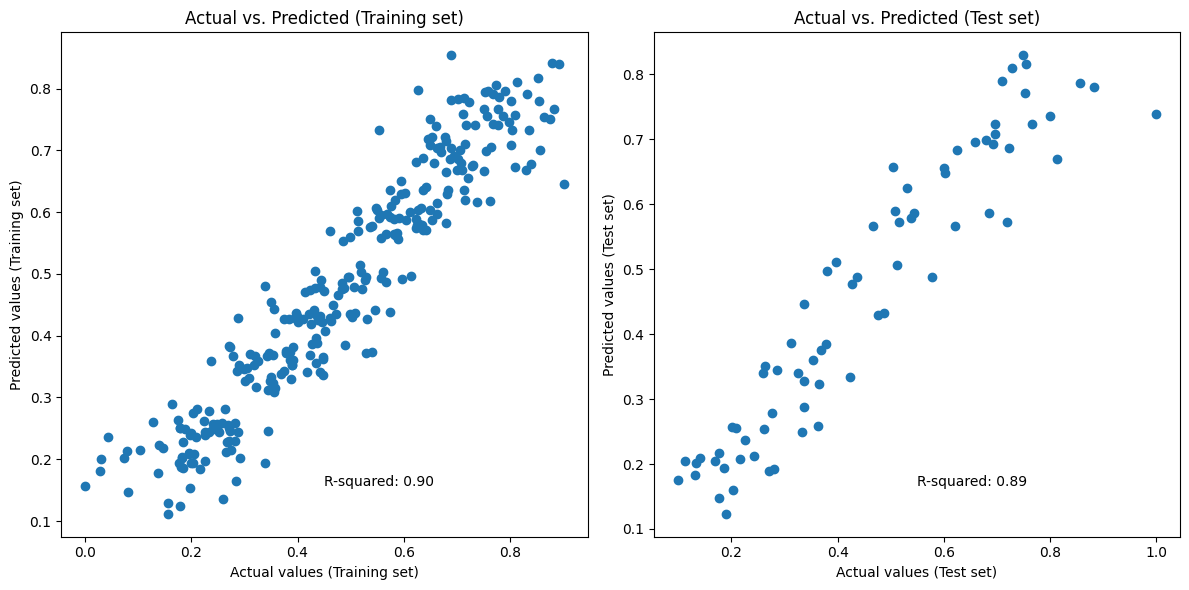

In [5]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(r2_train)

# Create scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual values (Training set)')
plt.ylabel('Predicted values (Training set)')
plt.title('Actual vs. Predicted (Training set)')
plt.text(0.5, 0.1, f'R-squared: {r2_train:.2f}', transform=plt.gca().transAxes)

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values (Test set)')
plt.ylabel('Predicted values (Test set)')
plt.title('Actual vs. Predicted (Test set)')
plt.text(0.5, 0.1, f'R-squared: {r2_test:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
